In [1]:
import numpy as np
from pymanopt.manifolds import Sphere
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import mala.potentials
import mala.utils as my
import mala.metropolis_hastings as vanilla_mh
import mala.MA_metropolis_hastings as mamh

%load_ext autoreload
%autoreload 2

/Users/adeladepavia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/adeladepavia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


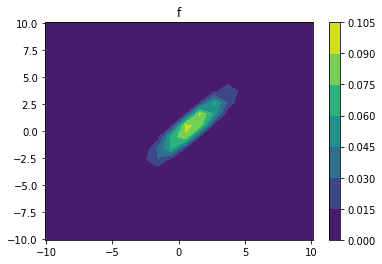

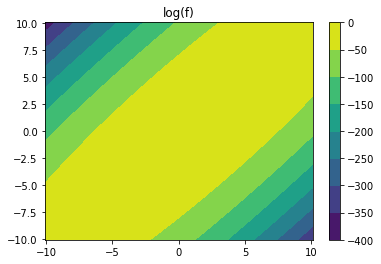

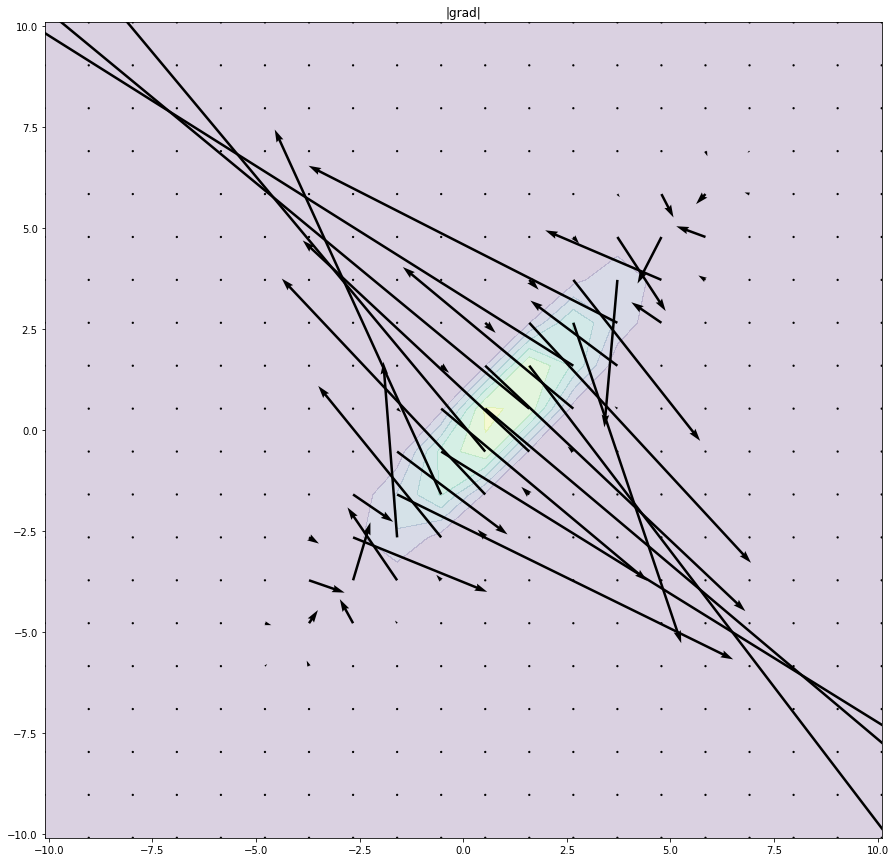

In [3]:
Sigma = 3*np.array([[ 1. , 1.0], [1.0,  1.2]])
Mu = np.array([1,0.5])

H = mala.potentials.Gaussian(ambient_dim=2,
                                   proper_dim = 2,mu = Mu,cov=Sigma)
my.plot_potential(H,[-10,10])

Manifold-Adjusted MALA


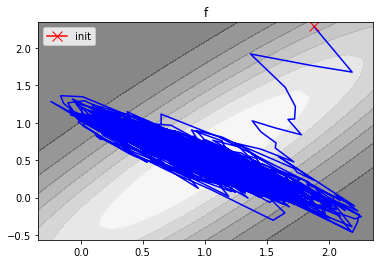

Last  100  samples: estimated covariance
[[ 0.20109363 -0.12732296]
 [-0.12732296  0.08553494]]


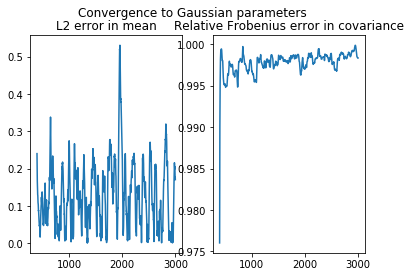

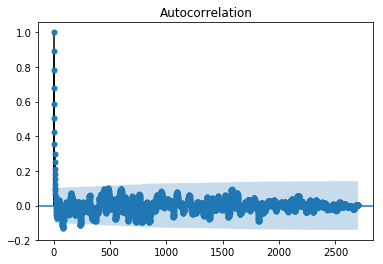

In [133]:
x_0 = 1*np.array([-1,1])
T = 3000
step_size = 0.2

burnin=300


print('Manifold-Adjusted MALA')
info_matrix = (lambda x,traj : mamh.empirical_Fisher_metric(H,x,traj,burnin))
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,traj: mamh.const_K_langevin(x,traj,info_matrix,H,step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution[burnin:],gradient=False)
my.Gaussian_convergence(H,evolution[burnin:],print_cov=True)

plot_acf([v.pos[0] for v in evolution[burnin:]])
plt.show()

(3001, 2)


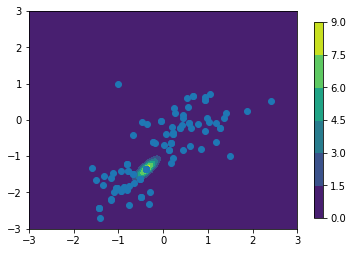

In [123]:
from scipy.stats import multivariate_normal

data = np.array([v.pos for v in evolution])
print(data.shape)

mean = np.mean(data, axis=0)
cov = np.cov(data, rowvar=0)

rv = multivariate_normal(mean, cov)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cs = ax2.contourf(x, y, rv.pdf(pos))
fig2.colorbar(cs, ax=ax2, shrink=0.9)
plt.scatter([v.pos[0] for v in evolution],[v.pos[1] for v in evolution])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

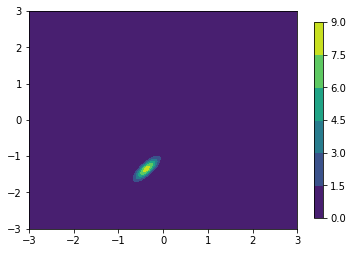

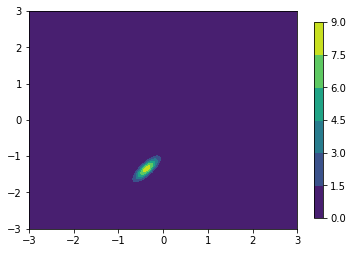

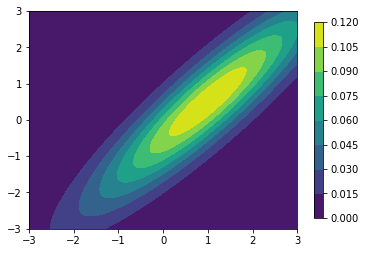

In [124]:
est_rv = multivariate_normal(mean, cov)
true_rv = multivariate_normal(Mu, Sigma)

x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cs= ax2.contourf(x, y, np.abs(est_rv.pdf(pos)-true_rv.pdf(pos)))
fig2.colorbar(cs, ax=ax2, shrink=0.9)
plt.show

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cs = ax2.contourf(x, y, est_rv.pdf(pos))
fig2.colorbar(cs, ax=ax2, shrink=0.9)
plt.show

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cs = ax2.contourf(x, y, true_rv.pdf(pos))
fig2.colorbar(cs, ax=ax2, shrink=0.9)
plt.show